# PID Control Loop

### This code can be included as a module. the PID object and method can be called to input a current position as determined by the YOLO results tensor, then the PID object will output motor commands in text. As a future step, we will work on interfacing the motor command output with the actual robot arm.

In [1]:
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, kp=1.0, ki=0.0, kd=0.0):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.integral = 0
        self.prev_error = 0

    def update(self, error):
        self.integral += error
        derivative = error - self.prev_error
        self.prev_error = error
        return self.kp * error + self.ki * self.integral + self.kd * derivative


# Instantiate separate PID controllers for x and y
x_pid = PIDController(kp=1.0, ki=0.0, kd=0.1)
y_pid = PIDController(kp=1.0, ki=0.0, kd=0.1)

def PID(x, y):
    # Compute control values
    x_control = x_pid.update(-x)  # Negative to steer toward 0
    y_control = y_pid.update(-y)

    # Determine horizontal direction
    if x_control > 0:
        horizontal = 'right'
    elif x_control < 0:
        horizontal = 'left'
    else:
        horizontal = 'none'

    # Determine vertical direction
    if y_control > 0:
        vertical = 'up'
    elif y_control < 0:
        vertical = 'down'
    else:
        vertical = 'none'

    # Visualization
    plt.figure()
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.scatter([x], [y], color='blue', label='Current Position')
    plt.quiver(x, y, x_control, y_control, angles='xy', scale_units='xy', scale=1, color='red', label='Control Vector')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title(f"Position: ({x}, {y}) | Vertical: {vertical}, Horizontal: {horizontal}")
    plt.grid(True)
    plt.show()

    return vertical, horizontal

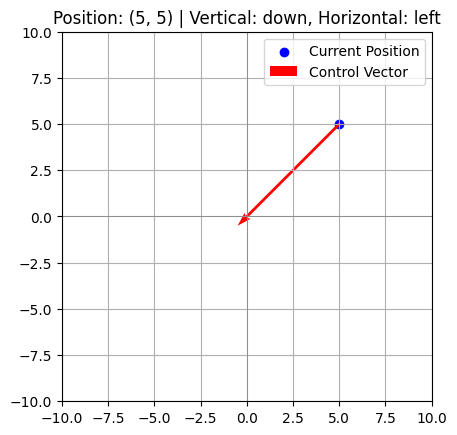

At (5, 5), move vertically: down, horizontally: left


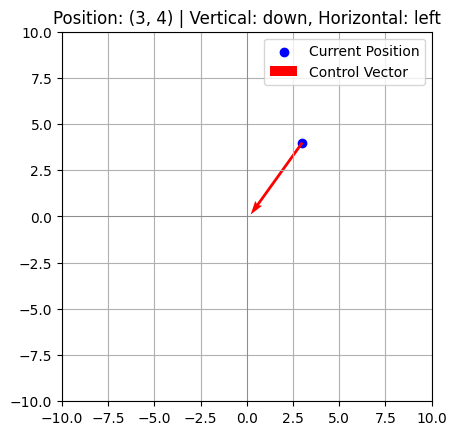

At (3, 4), move vertically: down, horizontally: left


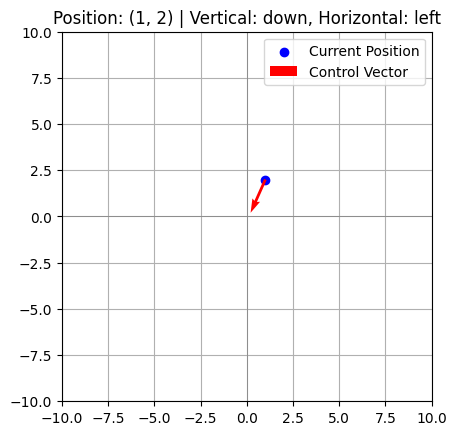

At (1, 2), move vertically: down, horizontally: left


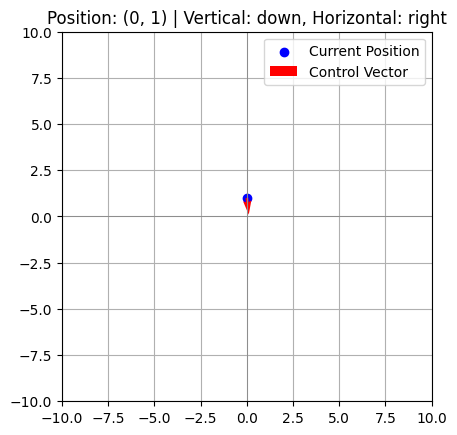

At (0, 1), move vertically: down, horizontally: right


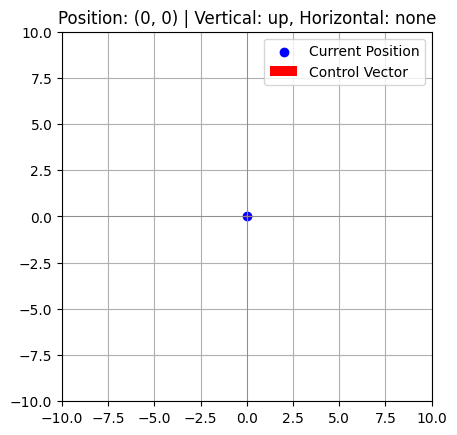

At (0, 0), move vertically: up, horizontally: none


In [2]:
# Sample input and outputs commands
if __name__ == "__main__":
    positions = [(5, 5), (3, 4), (1, 2), (0, 1), (0, 0)]
    for pos in positions:
        v_cmd, h_cmd = PID(*pos)
        print(f"At {pos}, move vertically: {v_cmd}, horizontally: {h_cmd}")
